In [13]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Classification

## Chronic Kidney Disease

In [2]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [3]:
ckd.num_rows

158

In [4]:
ckd.group('Class')

Class,count
0,115
1,43


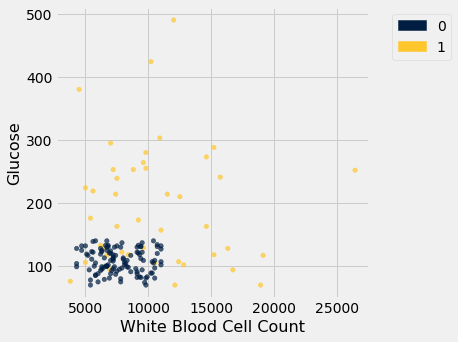

In [7]:
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Class')

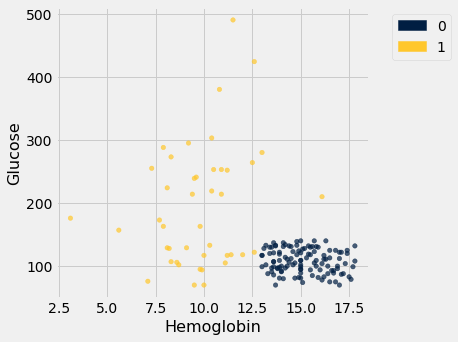

In [8]:
ckd.scatter('Hemoglobin', 'Glucose', colors='Class')

## Counterfeit Banknotes

In [9]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


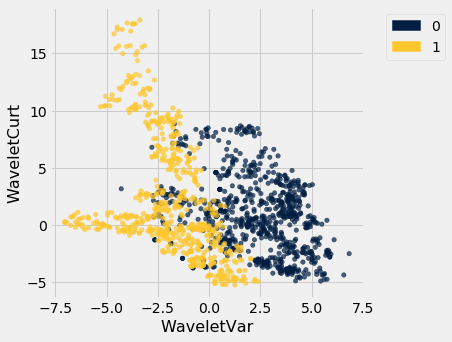

In [10]:
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Class')

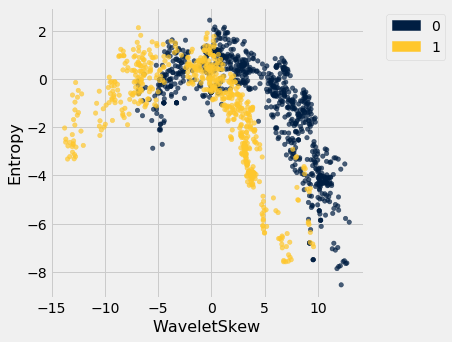

In [11]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Class')

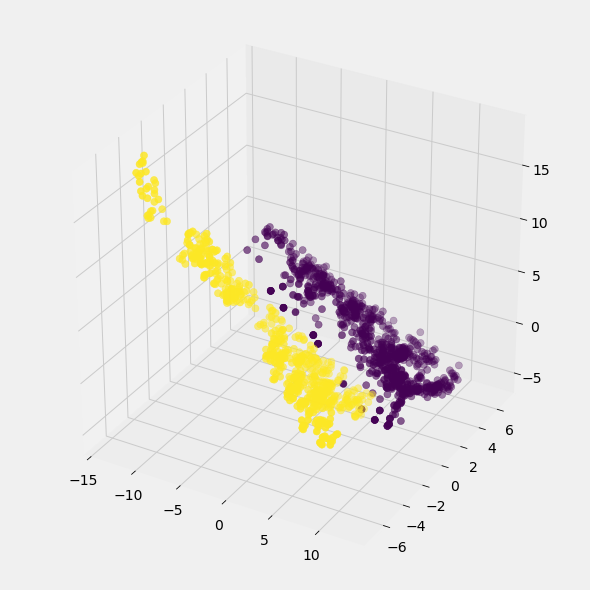

In [12]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'),
          banknotes.column('WaveletVar'),
          banknotes.column('WaveletCurt'),
          c = banknotes.column('Class'),
          s=50)

## Brittany Wenger's Experiment

In [14]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0


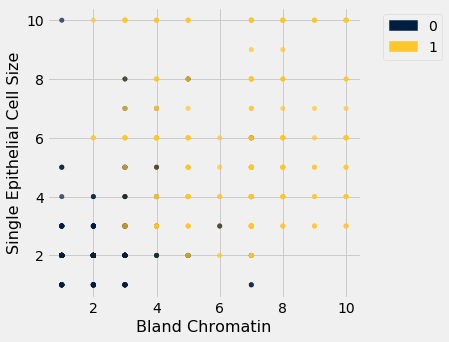

In [15]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', colors='Class')

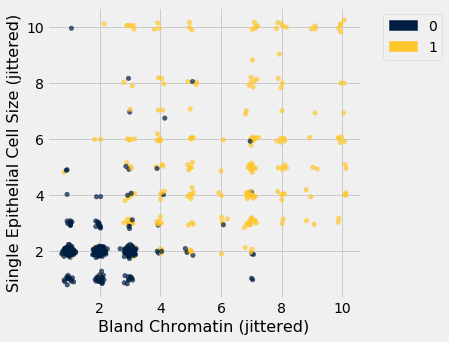

In [16]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter(0, 1, colors='Class')

### Distance ###

In [17]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    # (1, 2, 3)<-> (1, 4, 8)
    # TODO: complete function
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    # TODO: complete function
    return distance(np.array(row1), np.array(row2))

In [18]:
attributes = patients.drop('Class')
attributes.show(3)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1


In [19]:
row_distance(attributes.row(0), attributes.row(1))

11.874342087037917

In [20]:
row_distance(attributes.row(0), attributes.row(0))

0.0

In [21]:
row_distance(attributes.row(1), attributes.row(0))

11.874342087037917

### Classification Procedure ###

In [22]:
def distances(training, example):
    """Compute distance between example and every row in training.
    Return training augmented with Distance column"""
    # TODO: complete function
    dist = make_array()
    attributes = training.drop('Class')
    for r in attributes.rows:
        dist = np.append(dist,row_distance(r, example))
    return training.with_column('Distance', dist)

In [23]:
patients.take(15)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
7,4,6,4,6,1,4,3,1,1


In [25]:
example = attributes.row(15)

In [26]:
distances(patients, example)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
5,1,1,1,2,1,3,1,1,0,8.24621
5,4,4,5,7,10,3,2,1,0,9.64365
3,1,1,1,2,2,3,1,1,0,9
6,8,8,1,3,4,3,7,1,0,8.06226
4,1,1,3,2,1,3,1,1,0,8.06226
8,10,10,8,7,10,9,7,1,1,13.8564
1,1,1,1,2,10,3,1,1,0,13.4536
2,1,2,1,2,1,3,1,1,0,8.94427
2,1,1,1,2,1,1,1,5,0,10.6301
4,2,1,1,2,1,2,1,1,0,8.42615


In [ ]:
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    # TODO: complete function
    return training

In [ ]:
def majority_class(topk):
    """Return the class with the highest count"""
    # TODO: complete function
    return None

def classify(training, example, k):
    "Return the majority class among the k nearest neighbors of example"
    # TODO: complete function
    return None

In [ ]:
classify(patients.exclude(15), example, 5)

### Evaluation ###

In [ ]:
patients.num_rows

In [ ]:
shuffled = patients.sample(with_replacement=False) # Randomly permute the rows
training_set = shuffled.take(np.arange(342))
test_set  = shuffled.take(np.arange(342, 683))

In [ ]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    # TODO: complete function
    return 0

In [ ]:
evaluate_accuracy(training_set, test_set, 5)